# Anomaly Detection in credit card transactions using unsupevised methods

The goal of this exercise is to detect anomalous events in clients credit card transactions dataset.

For this task, the dataset used contains 7108 transactions out of which 20 are frauds, accounting for 0.28% of the data. There are 28 features available for the task, representing a fraction of a much higher number of features in the original dataset. 
The features are labeled V1, V2..., V28 and are the result of apply PCA to the original higher dimensional feature space, in order to preserve the confidentiality of the clients.

The label for each transaction is 0 for nominal and 1 for anomaly.



The data used in this exercise is a tiny fraction of a much larger dataset from the Kaggle competition website. More details about the complete dataset can be found on Kaggle at https://www.kaggle.com/mlg-ulb/creditcardfraud

In [ ]:
#Load the needed libraries

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, confusion_matrix

Import the data

In [ ]:
data = pd.read_csv("fraud_detection_data1.csv")
data.head()

In [ ]:
print(len(data.loc[data['Class']==0]))
print(len(data.loc[data['Class']==1]))

Visualize the class distribution of the data

In [ ]:
_, counts = np.unique(np.array(data['Class']), return_counts=True)
labels = ["Nominal", "Fraud"]
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

As we can see the dataset is very imbalanced and doesn't have enough negative example to train a regular classifier to separate nominal and anomalies. 
Unsupervised learning approaches have shown to perform better in this kind of situation.

In [ ]:
# Split the label from the features
true_label = data['Class']
data.drop('Class',1, inplace=True)

Exploration of both normal and fraud data

In [ ]:
nominal_samples = data.loc[data['Class']==0]
fraud_samples = data.loc[data['Class']==1]

print("Normal transactions: \n")
print(nominal_samples['Amount'].describe())
print("\n ----------------------------------------------------------- \n")
print("Fraud transactions: \n")
print(fraud_samples['Amount'].describe())
print("\n")

In [ ]:
# Function for printing the performance of the model
def print_performance(y_true, y_pred, method="IF"):
    print("Nomber of outlier detected by {}: {}".format(method, len(y_pred[y_pred==1])))
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    print("{} accuracy score: {}".format(method, accuracy_score(y_true, y_pred)))
    print("{} precision: {}".format(method, precision))
    print("{} recall: {}".format(method, recall))
    print("TN: {}, FP: {}, FN: {}, TP: {}".format(TN, FP, FN, TP))

## Isolation Forest Method

Isolation Forest [Fei Tony Liu, Kai Ming Ting and Zhi-Hua Zhou] is an unsupervised learning algorithm that extends the principle of Random Forest classifier. It uses the main properties of anomalies to isolate them from the rest of the data point. Thoses properties are:
* There are generaly a tiny number of outliers compared to normal observations
* Outliers deviate significantly from the rest of the observations

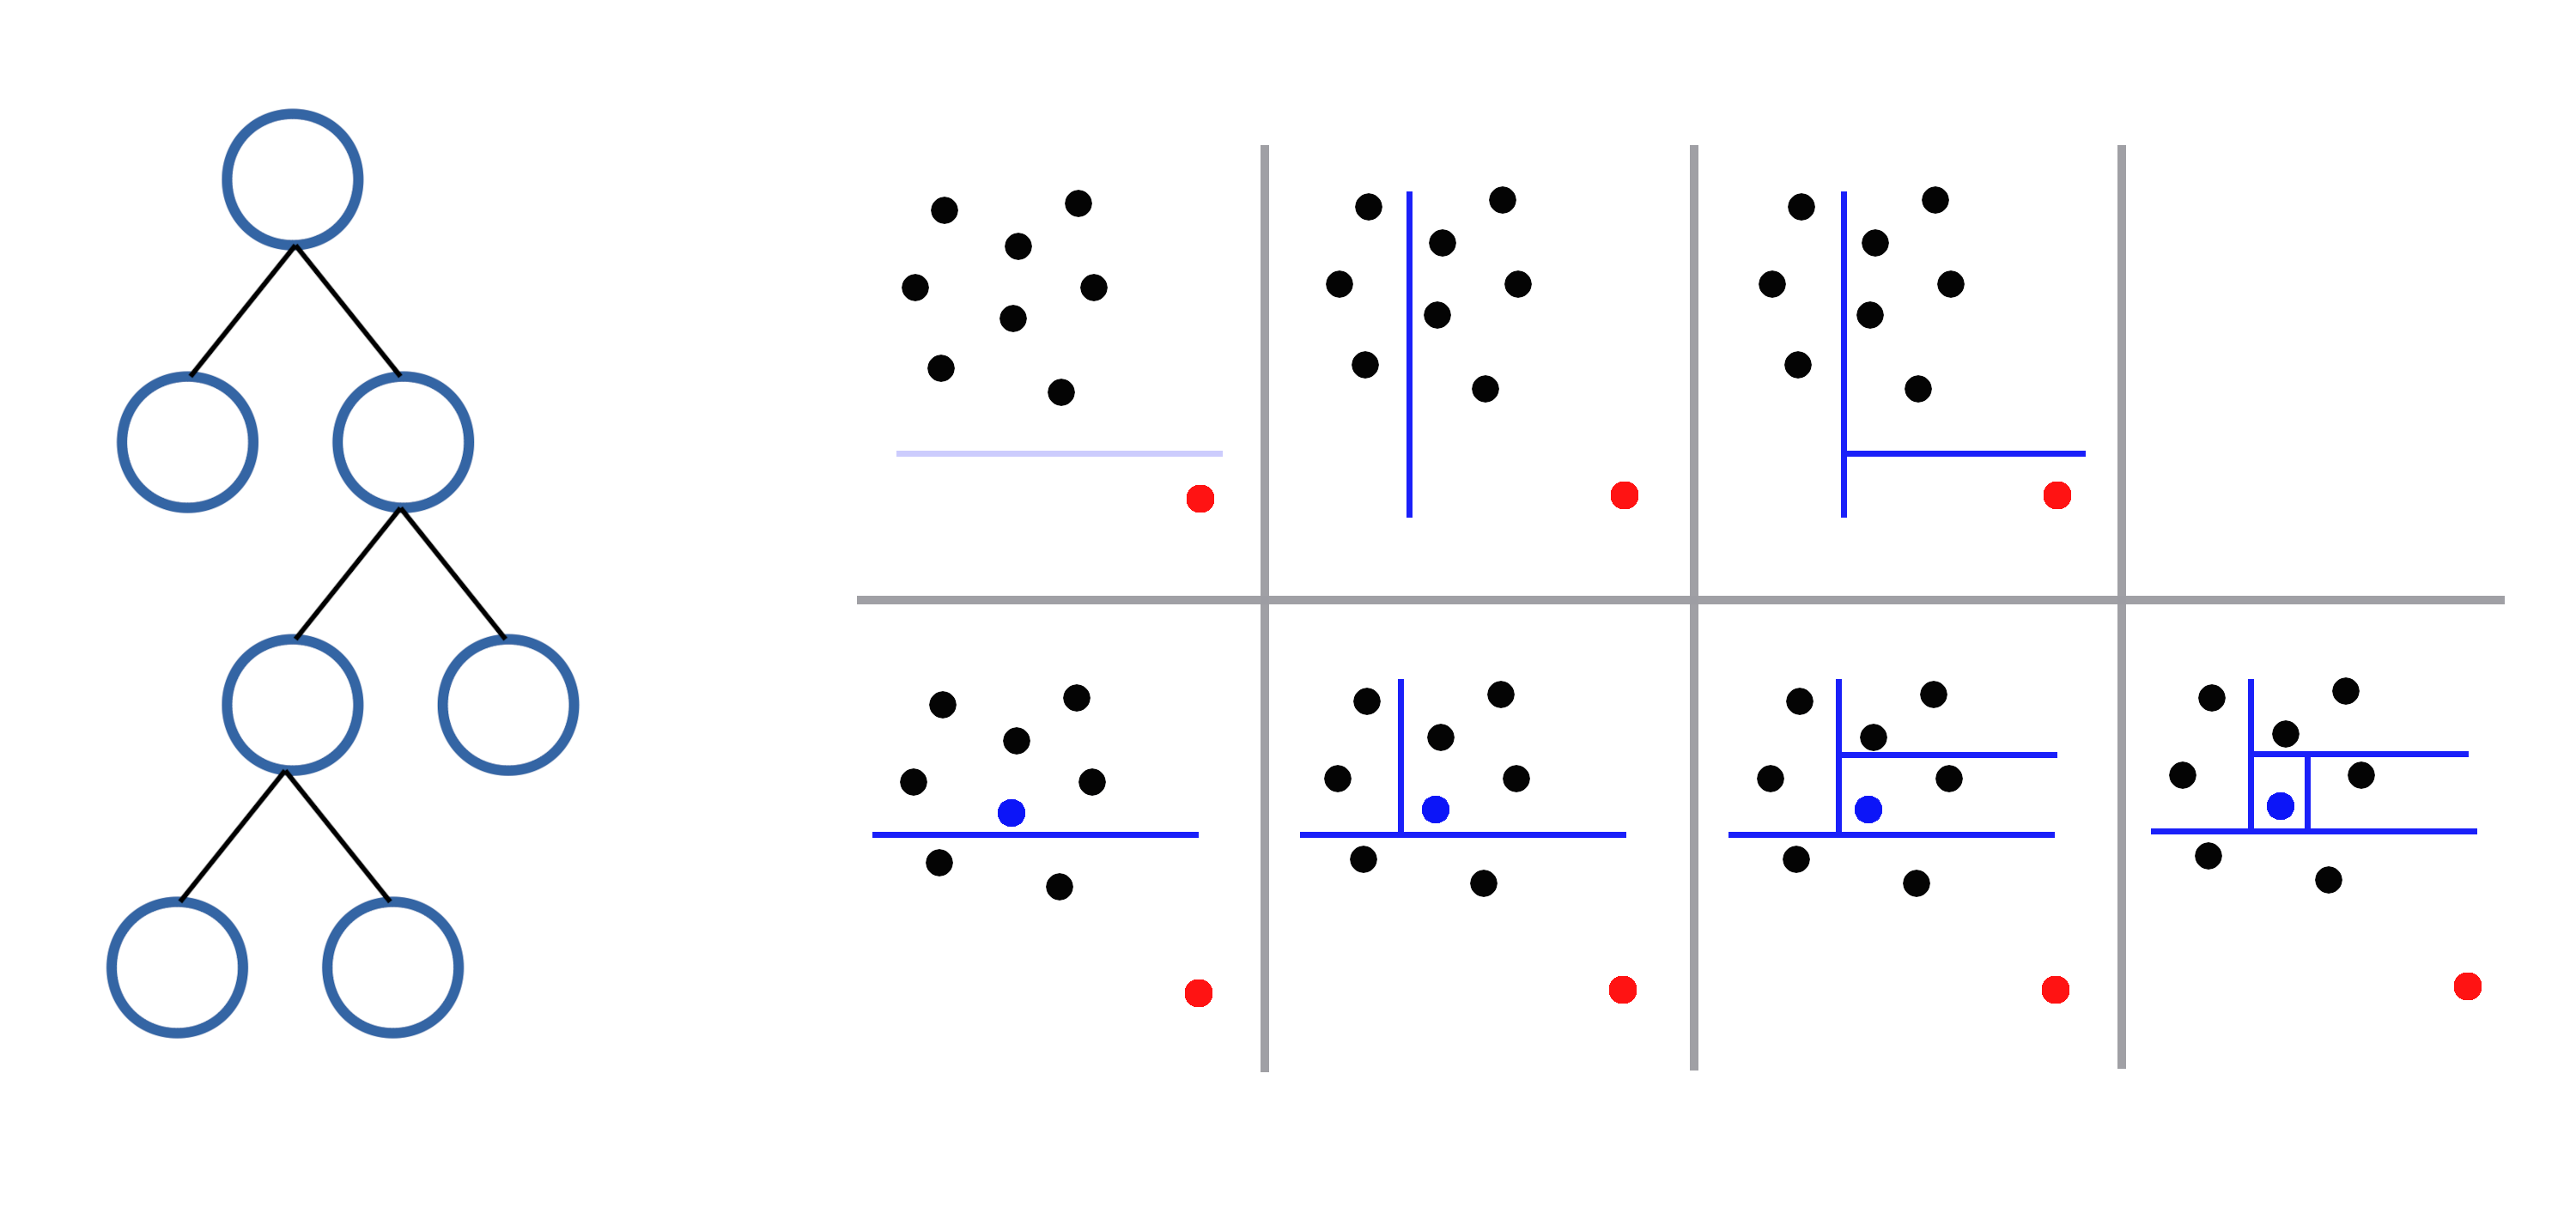

In [ ]:
# Fit the model to the data
IF_model = IsolationForest(n_estimators=100, random_state=0).fit(data)
IF_pred = IF_model.predict(data)

# Isolation forest predicts 1 for inlier and -1 for outlier and the true label is 0 or inlier and 1 for outlier
IF_pred = np.where(IF_pred==1, 0, 1)
print_performance(true_label, IF_pred, method="Isolation Forest")

## Local Outlier Factor

The local outlier factor [Markus M. Breunig, Hans-Peter Kriegel, Raymond T. Ng and Jörg Sander] is based on a concept of a local density, where locality is given by k nearest neighbors, whose distance is used to estimate the density. By comparing the local density of an object to the local densities of its neighbors, one can identify regions of similar density, and points that have a substantially lower density than their neighbors. These are considered to be outliers. https://en.wikipedia.org/wiki/Local_outlier_factor

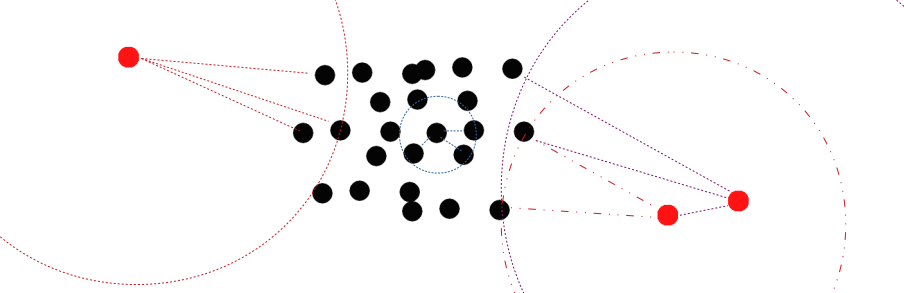

In [ ]:
# Fit the model to the data
LOF_pred = LocalOutlierFactor(n_neighbors=10).fit_predict(data)

# Isolation forest predicts 1 for inlier and -1 for outlier and the true label is 0 or inlier and 1 for outlier
LOF_pred = np.where(LOF_pred==1, 0, 1)
print_performance(true_label, LOF_pred, method="LOF")

# Exercise

With the "fraud_detection_data2.csv" dataset:
* 1) Implement IForest and Local Outliers Factor
* 2) Use K-Nearest Neighbors classifier to detect anomalies in the data. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Compare the performance (accuracy, precision and recall) obtained using the supervised method (KNN) with the performances of Isolation Forest and Local Outliers Factor.

You will have to split the data into training and testing set for KNN. The script below implememts a simple way of splitting the data.

In [ ]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, true_label, test_size=0.3, random_state=0)